# **LOAD THE DATASET**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/kaggle/input/task2wec/train_data.csv")
df2 = pd.read_csv("/kaggle/input/task2wec/test_data.csv")

In [ ]:
df['w'].unique()


array([-2.5, -2. , -1.5, -1. , -0.5,  0.5,  1. ,  1.5,  2. ,  2.5])

# **DATA VISUALIZATION AND ANALYSIS**

nothing to see here, let's plot the graph for all unique values of w

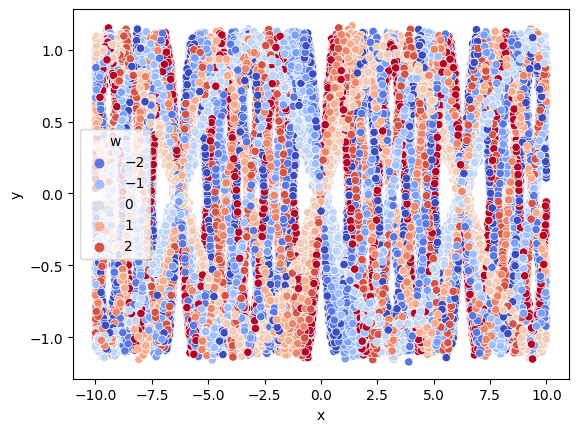

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_df = df.sample(100_000)
sns.scatterplot(data=sample_df, x='x', y='y', hue='w', palette='coolwarm')
plt.show()

In [ ]:
unique_w = [-2.5, -2. , -1.5, -1. , -0.5,  2.5,  2. ,  1.5,  1. ,  0.5]

this is some intresting result 🤑

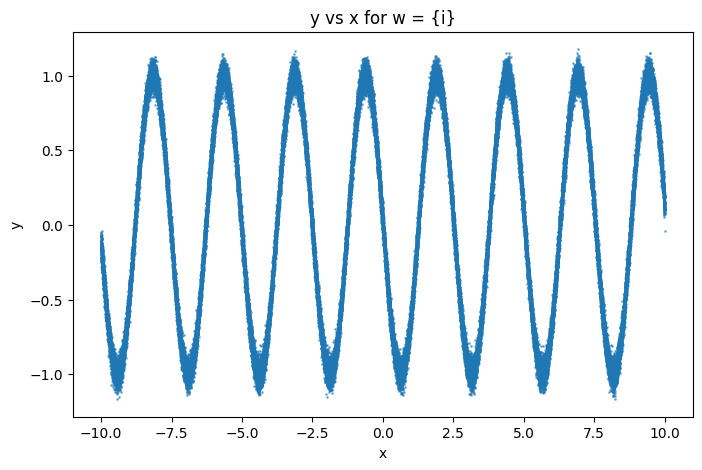

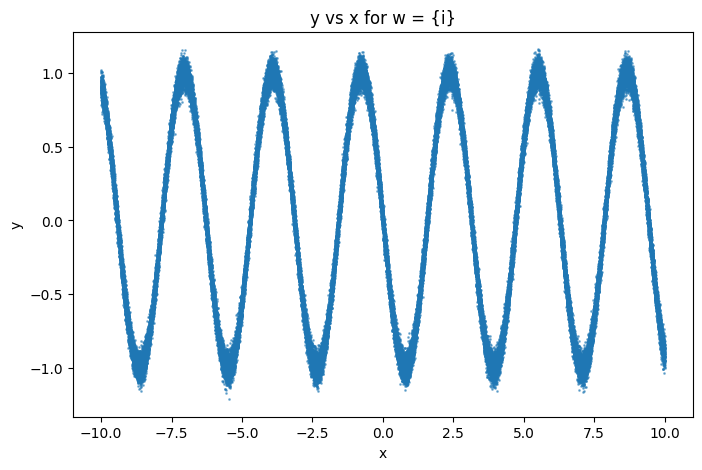

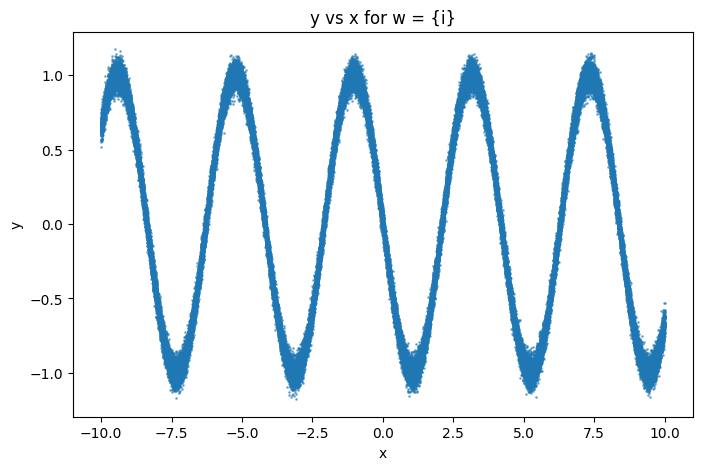

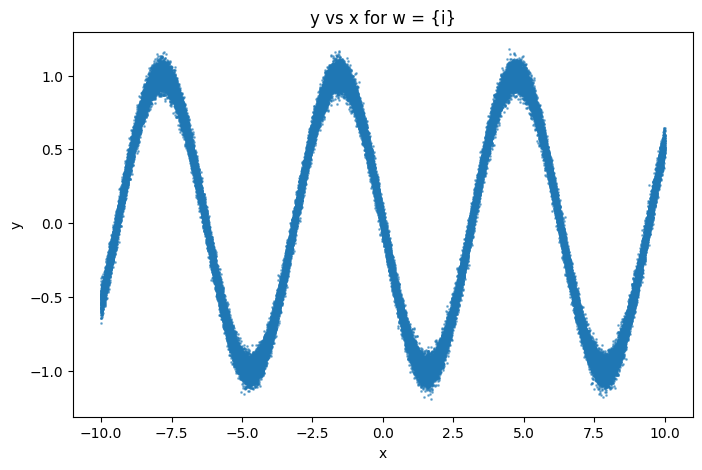

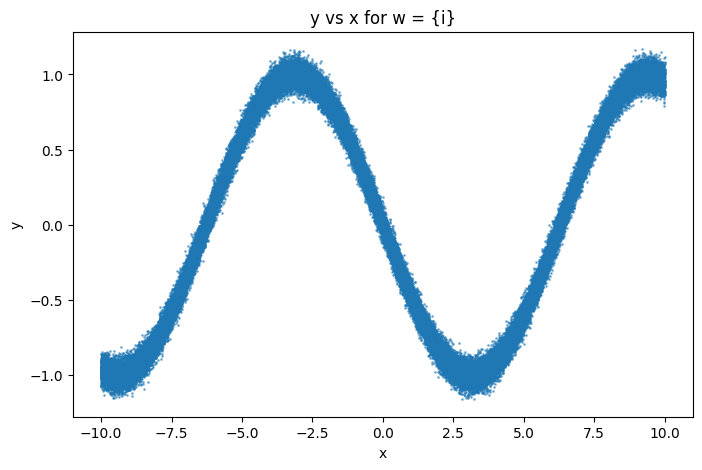

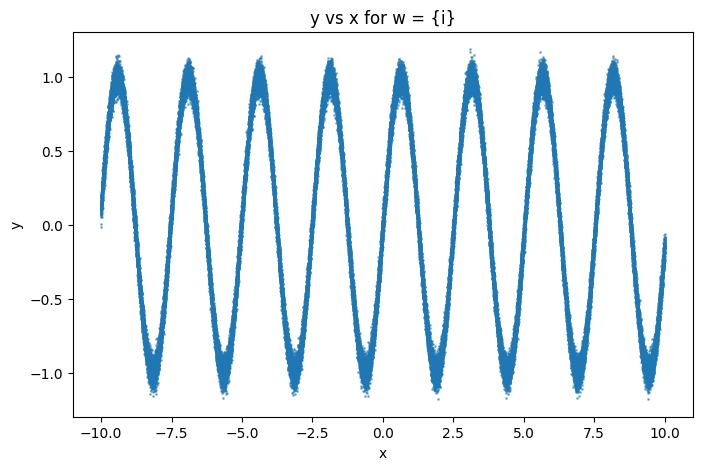

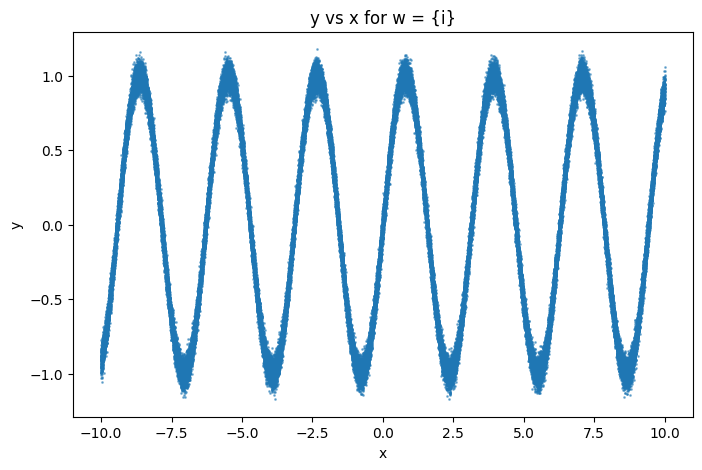

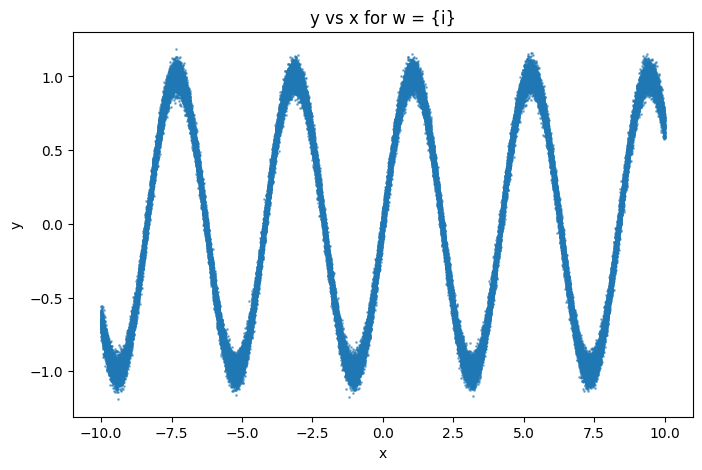

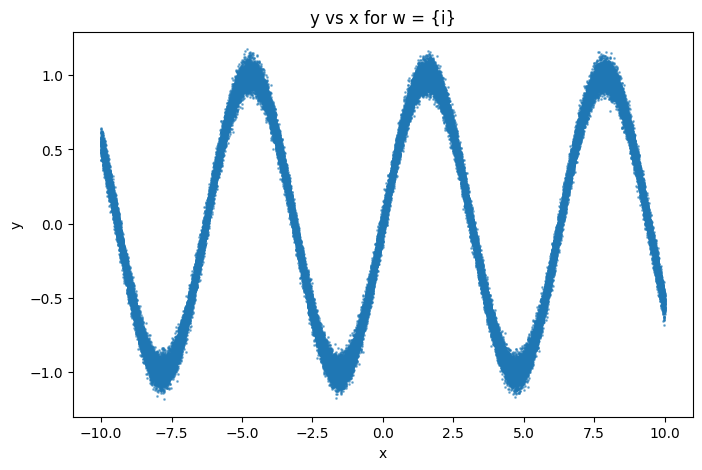

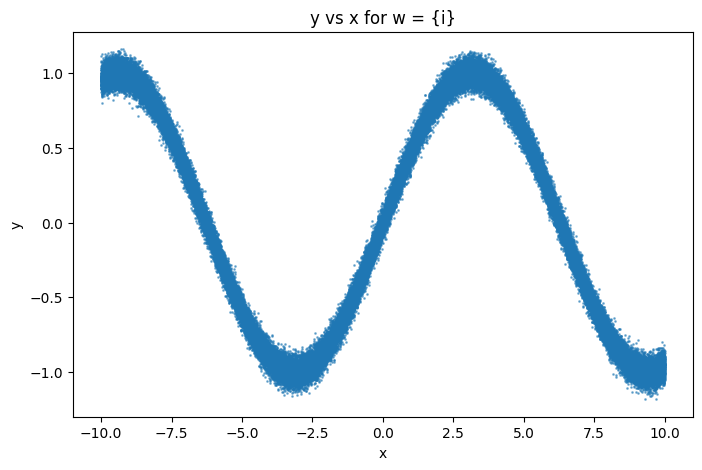

In [ ]:
for i in unique_w:
    df_w = df[df['w'] == i].sample(100_000, random_state=42)
    plt.figure(figsize=(8, 5))
    plt.scatter(df_w['x'], df_w['y'], s=1, alpha=0.5)  # s=1 for tiny dots (fast for big data)
    plt.title("y vs x for w = {i}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()



from this we can clearly see that the graph for all unique value w is of the form of a sine wave, or a cosine wave

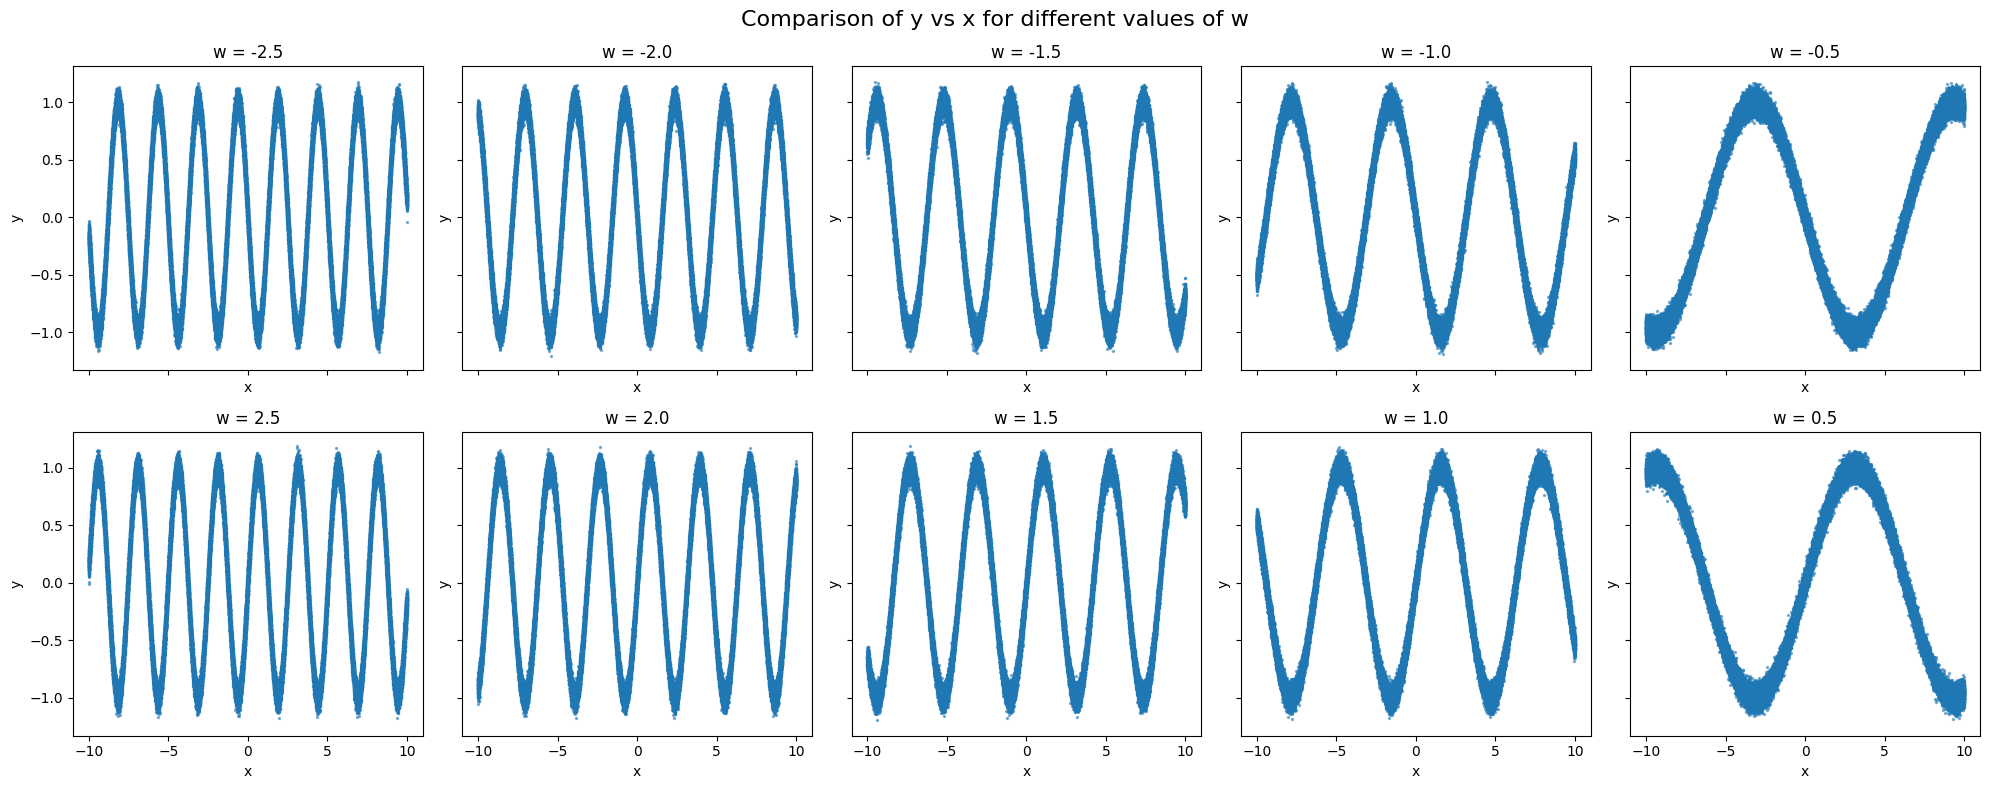

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, w_value in enumerate(unique_w):

    df_w = df[df['w'] == w_value]


    if len(df_w) > 100_000:
        df_w = df_w.sample(100_000, random_state=42)


    axes[i].scatter(df_w['x'], df_w['y'], s=2, alpha=0.5)
    axes[i].set_title(f"w = {w_value}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")

plt.suptitle("Comparison of y vs x for different values of w", fontsize=16)
plt.tight_layout()
plt.show()

let's plot a graph for the combination of w and x (w*x)

and wow, its so perfect

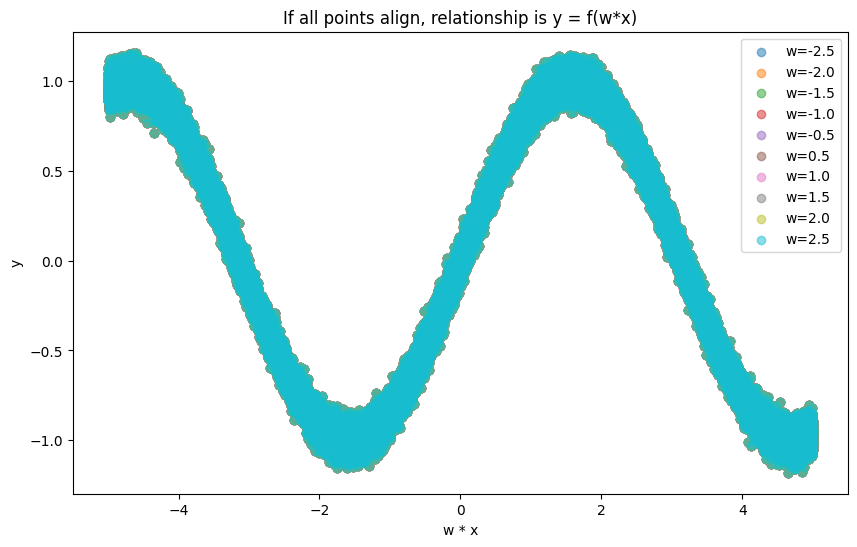

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
for w_val in np.unique(df['w']):
    data = df[df['w'] == w_value]

    if len(data) > 100_000:
        data = data.sample(100_000, random_state=42)
    plt.scatter(data['w'] * data['x'], data['y'], alpha=0.5, label=f'w={w_val}')
plt.xlabel('w * x')
plt.ylabel('y')
plt.title('If all points align, relationship is y = f(w*x)')
plt.legend()
plt.show()

# **MAKING THE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split


df_small, df_test = train_test_split(
    df,
    train_size=0.6,
    stratify=df['w'],
    random_state=42
)

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


most basic approach will be to fit an sine wave or coswave function. like linear regression but instead of wx + b we take sine function

In [ ]:
def sine_model(X, A, phi, B):

    w, x = X  # Extract w and x arrays
    return A * np.sin(w * x + phi) + B

In [ ]:
input_data = np.array([df_small['w'].values, df_small['x'].values])
output_data = df_small['y'].values

In [ ]:
params, covariance = curve_fit(
        sine_model,           # Function to fit
        input_data,               # Input data (w, x)
        output_data,               # Target data (y)
        p0=[1.0, 0.0, 0.0],   # Initial guess [A, phi, B]
        maxfev=10000          # Max iterations
    )

In [ ]:
A, phi, B = params

# **MODEL EVALUATION**

In [ ]:
test_input = np.array([df_test['w'].values, df_test['x'].values])
test_output = df_test['y'].values

In [ ]:
y_pred = sine_model(test_input, A, phi, B)

In [ ]:
mse = mean_squared_error(test_output, y_pred)

In [ ]:
mse

0.002499973181572192

In [ ]:
r2 = r2_score(test_output, y_pred)
r2

0.9950528173338213

In [ ]:
df2

,w,x
0,-2.5,-20.640539
1,-2.5,21.636451
2,-2.5,-16.856414
3,-2.5,89.961916
4,-2.5,13.535599
...,...,...
99999995,2.5,-13.112750
99999996,2.5,74.421580
99999997,2.5,85.580227
99999998,2.5,30.176842
